# Creating Rubik's cubes configurations

This file contains a function that produces a valid Rubik's cube configuration out of a 3x3 matrix.

## 1. Creating a Rubik's cube configuration

We know a 3x3 matrix, now we need to figure the rest of the cube.

There are 6 fixed pieces and 20 changing. Better saying, in the 2D matrix there are 48 values that change position. We already know 8 from the input matrix, now we need to figure the other 40. In total, there are only 9 cells with the same color.

In my representation, the 0-8 representation of a side has 4 corners (0,2,6,8), 4 edges (1,3,5,7), and a center (4).

We know that there is no piece in combination with the opposite color, e.g. edge piece with white and yellow.

We know that each piece is unique, e.g. edge piece with green and white.

As there is a set of 26 pre-defined pieces, I am going to stick to this idea and scramble them.

After, I am going to test and see if the scramble is valid.

There might be more efficient ways of doing this, but I thought this could work properly.

In [1]:
import random

In [24]:
# function to generate a cube based on a face
def generate_cube(matrix_mosaic):
    cube = [ [6 for _ in range(9)] for _ in range(6)]

    face = matrix_mosaic[4]

    cube[face] = matrix_mosaic

    # each number represents a color defined on the create_cube_dataset.ipynb
    corners = [[0, 2, 4], [0, 2, 5], [0, 5, 3], [0, 3, 4], [1, 2, 5], [1, 2, 4], [1, 4, 3], [1, 3, 5]]
    edges = [[0, 2], [0, 4], [0, 3], [0, 5], [1, 2], [1, 4], [1, 3], [1, 5], [3, 5], [3, 4], [2, 4], [2, 5]]

    # 4 corners (0,2,6,8), 4 edges (1,3,5,7), and a center (4)

    # each side has a certain configuration
    # white
    def white():
        # if it was the face provided
        if cube[0][4] == 0:
            # corners
            cubie = random.choice([ c for c in corners if cube[0][0] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[0][0]))
            random.shuffle(cubie)
            cube[4][2] = cubie[0]
            cube[2][6] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[0][2] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[0][2]))
            random.shuffle(cubie)
            cube[2][8] = cubie[0]
            cube[5][0] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[0][6] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[0][6]))
            random.shuffle(cubie)
            cube[4][8] = cubie[0]
            cube[3][0] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[0][8] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[0][8]))
            random.shuffle(cubie)
            cube[5][6] = cubie[0]
            cube[3][2] = cubie[1]

            # edges
            cubie = random.choice([ e for e in edges if cube[0][1] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[0][1]))
            random.shuffle(cubie)
            cube[2][7] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[0][3] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[0][3]))
            random.shuffle(cubie)
            cube[4][5] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[0][5] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[0][5]))
            random.shuffle(cubie)
            cube[5][3] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[0][7] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[0][7]))
            random.shuffle(cubie)
            cube[3][1] = cubie[0]

        else:
            # center
            cube[0][4] = 0

            # corners
            if cube[0][0] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[0][0] = cubie[0]
                cube[4][2] = cubie[1]
                cube[2][6] = cubie[2]

            if cube[0][2] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[0][2] = cubie[0]
                cube[2][8] = cubie[1]
                cube[5][0] = cubie[2]

            if cube[0][6] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[0][6] = cubie[0]
                cube[4][8] = cubie[1]
                cube[3][0] = cubie[2]

            if cube[0][8] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[0][8] = cubie[0]
                cube[5][6] = cubie[1]
                cube[3][2] = cubie[2]

            # edges
            if cube[0][1] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[0][1] = cubie[0]
                cube[2][7] = cubie[1]

            if cube[0][3] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[0][3] = cubie[0]
                cube[4][5] = cubie[1]

            if cube[0][5] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[0][5] = cubie[0]
                cube[5][3] = cubie[1]

            if cube[0][7] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[0][7] = cubie[0]
                cube[3][1] = cubie[1]

    # yellow
    def yellow():
        # if it was the face provided
        if cube[1][4] == 1:
            # corners
            cubie = random.choice([ c for c in corners if cube[1][0] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[1][0]))
            random.shuffle(cubie)
            cube[5][2] = cubie[0]
            cube[2][2] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[1][2] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[1][2]))
            random.shuffle(cubie)
            cube[4][0] = cubie[0]
            cube[2][0] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[1][6] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[1][6]))
            random.shuffle(cubie)
            cube[5][8] = cubie[0]
            cube[3][8] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[1][8] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[1][8]))
            random.shuffle(cubie)
            cube[4][6] = cubie[0]
            cube[3][6] = cubie[1]

            # edges
            cubie = random.choice([ e for e in edges if cube[1][1] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[1][1]))
            random.shuffle(cubie)
            cube[2][1] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[1][3] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[1][3]))
            random.shuffle(cubie)
            cube[5][5] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[1][5] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[1][5]))
            random.shuffle(cubie)
            cube[4][3] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[1][7] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[1][7]))
            random.shuffle(cubie)
            cube[3][7] = cubie[0]

        else:
            # center
            cube[1][4] = 1

            # corners
            if cube[1][0] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[1][0] = cubie[0]
                cube[5][2] = cubie[1]
                cube[2][2] = cubie[2]

            if cube[1][2] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[1][2] = cubie[0]
                cube[4][0] = cubie[1]
                cube[2][0] = cubie[2]

            if cube[1][6] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[1][6] = cubie[0]
                cube[5][8] = cubie[1]
                cube[3][8] = cubie[2]

            if cube[1][8] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[1][8] = cubie[0]
                cube[4][6] = cubie[1]
                cube[3][6] = cubie[2]

            # edges
            if cube[1][1] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[1][1] = cubie[0]
                cube[2][1] = cubie[1]

            if cube[1][3] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[1][3] = cubie[0]
                cube[5][5] = cubie[1]

            if cube[1][5] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[1][5] = cubie[0]
                cube[4][3] = cubie[1]

            if cube[1][7] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[1][7] = cubie[0]
                cube[3][7] = cubie[1]


    # red
    def red():
        # if it was the face provided
        if cube[2][4] == 2:
            # corners
            cubie = random.choice([ c for c in corners if cube[2][0] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[2][0]))
            random.shuffle(cubie)
            cube[4][0] = cubie[0]
            cube[1][2] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[2][2] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[2][2]))
            random.shuffle(cubie)
            cube[5][2] = cubie[0]
            cube[1][0] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[2][6] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[2][6]))
            random.shuffle(cubie)
            cube[4][2] = cubie[0]
            cube[0][0] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[2][8] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[2][8]))
            random.shuffle(cubie)
            cube[5][0] = cubie[0]
            cube[0][2] = cubie[1]

            # edges
            cubie = random.choice([ e for e in edges if cube[2][1] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[2][1]))
            random.shuffle(cubie)
            cube[1][1] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[2][3] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[2][3]))
            random.shuffle(cubie)
            cube[4][1] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[2][5] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[2][5]))
            random.shuffle(cubie)
            cube[5][1] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[2][7] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[2][7]))
            random.shuffle(cubie)
            cube[0][1] = cubie[0]

        else:
            # center
            cube[2][4] = 2

            # corners
            if cube[2][0] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[2][0] = cubie[0]
                cube[4][0] = cubie[1]
                cube[1][2] = cubie[2]

            if cube[2][2] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[2][2] = cubie[0]
                cube[5][2] = cubie[1]
                cube[1][0] = cubie[2]

            if cube[2][6] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[2][6] = cubie[0]
                cube[4][2] = cubie[1]
                cube[0][0] = cubie[2]

            if cube[2][8] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[2][8] = cubie[0]
                cube[5][0] = cubie[1]
                cube[0][2] = cubie[2]

            # edges
            if cube[2][1] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[2][1] = cubie[0]
                cube[1][1] = cubie[1]

            if cube[2][3] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[2][3] = cubie[0]
                cube[4][1] = cubie[1]

            if cube[2][5] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[2][5] = cubie[0]
                cube[5][1] = cubie[1]

            if cube[2][7] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[2][7] = cubie[0]
                cube[0][1] = cubie[1]


    # orange
    def orange():
        # if it was the face provided
        if cube[3][4] == 3:
            # corners
            cubie = random.choice([ c for c in corners if cube[3][0] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[3][0]))
            random.shuffle(cubie)
            cube[4][8] = cubie[0]
            cube[0][6] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[3][2] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[3][2]))
            random.shuffle(cubie)
            cube[0][8] = cubie[0]
            cube[5][6] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[3][6] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[3][6]))
            random.shuffle(cubie)
            cube[4][6] = cubie[0]
            cube[1][8] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[3][8] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[3][8]))
            random.shuffle(cubie)
            cube[5][8] = cubie[0]
            cube[1][6] = cubie[1]

            # edges
            cubie = random.choice([ e for e in edges if cube[3][1] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[3][1]))
            random.shuffle(cubie)
            cube[0][7] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[3][3] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[3][3]))
            random.shuffle(cubie)
            cube[4][7] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[3][5] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[3][5]))
            random.shuffle(cubie)
            cube[5][7] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[3][7] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[3][7]))
            random.shuffle(cubie)
            cube[1][7] = cubie[0]

        else:
            # center
            cube[3][4] = 3

            # corners
            if cube[3][0] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[3][0] = cubie[0]
                cube[4][8] = cubie[1]
                cube[0][6] = cubie[2]

            if cube[3][2] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[3][2] = cubie[0]
                cube[0][8] = cubie[1]
                cube[5][6] = cubie[2]

            if cube[3][6] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[3][6] = cubie[0]
                cube[4][6] = cubie[1]
                cube[1][8] = cubie[2]

            if cube[3][8] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[3][8] = cubie[0]
                cube[5][8] = cubie[1]
                cube[1][6] = cubie[2]

            # edges
            if cube[3][1] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[3][1] = cubie[0]
                cube[0][7] = cubie[1]

            if cube[3][3] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[3][3] = cubie[0]
                cube[4][7] = cubie[1]

            if cube[3][5] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[3][5] = cubie[0]
                cube[5][7] = cubie[1]

            if cube[3][7] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[3][7] = cubie[0]
                cube[1][7] = cubie[1]


    # blue
    def blue():
        # if it was the face provided
        if cube[4][4] == 0:
            # corners
            cubie = random.choice([ c for c in corners if cube[4][0] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[4][0]))
            random.shuffle(cubie)
            cube[2][0] = cubie[0]
            cube[1][2] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[4][2] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[4][2]))
            random.shuffle(cubie)
            cube[2][6] = cubie[0]
            cube[0][0] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[4][6] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[4][6]))
            random.shuffle(cubie)
            cube[1][8] = cubie[0]
            cube[3][6] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[4][8] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[4][8]))
            random.shuffle(cubie)
            cube[0][6] = cubie[0]
            cube[3][0] = cubie[1]

            # edges
            cubie = random.choice([ e for e in edges if cube[4][1] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[4][1]))
            random.shuffle(cubie)
            cube[2][3] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[4][3] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[4][3]))
            random.shuffle(cubie)
            cube[1][5] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[4][5] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[4][5]))
            random.shuffle(cubie)
            cube[0][3] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[4][7] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[4][7]))
            random.shuffle(cubie)
            cube[3][3] = cubie[0]

        else:
            # center
            cube[4][4] = 4

            # corners
            if cube[4][0] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[4][0] = cubie[0]
                cube[2][0] = cubie[1]
                cube[1][2] = cubie[2]

            if cube[4][2] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[4][2] = cubie[0]
                cube[2][6] = cubie[1]
                cube[0][0] = cubie[2]

            if cube[4][6] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[4][6] = cubie[0]
                cube[3][6] = cubie[1]
                cube[1][8] = cubie[2]

            if cube[4][8] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[4][8] = cubie[0]
                cube[3][0] = cubie[1]
                cube[0][6] = cubie[2]

            # edges
            if cube[4][1] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[4][1] = cubie[0]
                cube[2][3] = cubie[1]

            if cube[4][3] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[4][3] = cubie[0]
                cube[1][5] = cubie[1]

            if cube[4][5] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[4][5] = cubie[0]
                cube[0][3] = cubie[1]

            if cube[4][7] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[4][7] = cubie[0]
                cube[3][3] = cubie[1]


    # green
    def green():
        # if it was the face provided
        if cube[5][4] == 0:
            # corners
            cubie = random.choice([ c for c in corners if cube[5][0] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[5][0]))
            random.shuffle(cubie)
            cube[0][2] = cubie[0]
            cube[2][8] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[5][2] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[5][2]))
            random.shuffle(cubie)
            cube[1][0] = cubie[0]
            cube[2][2] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[5][6] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[5][6]))
            random.shuffle(cubie)
            cube[0][8] = cubie[0]
            cube[3][2] = cubie[1]

            cubie = random.choice([ c for c in corners if cube[5][8] in c])
            cubie = corners.pop(corners.index(cubie))
            cubie.pop(cubie.index(cube[5][8]))
            random.shuffle(cubie)
            cube[1][6] = cubie[0]
            cube[3][8] = cubie[1]

            # edges
            cubie = random.choice([ e for e in edges if cube[5][1] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[5][1]))
            random.shuffle(cubie)
            cube[2][5] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[5][3] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[5][3]))
            random.shuffle(cubie)
            cube[0][5] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[5][5] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[5][5]))
            random.shuffle(cubie)
            cube[1][3] = cubie[0]

            cubie = random.choice([ e for e in edges if cube[5][7] in e])
            cubie = edges.pop(edges.index(cubie))
            cubie.pop(cubie.index(cube[5][7]))
            random.shuffle(cubie)
            cube[3][5] = cubie[0]

        else:
            # center
            cube[5][4] = 5

            # corners
            if cube[5][0] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[5][0] = cubie[0]
                cube[0][2] = cubie[1]
                cube[2][8] = cubie[2]

            if cube[5][2] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[5][2] = cubie[0]
                cube[1][0] = cubie[1]
                cube[2][2] = cubie[2]

            if cube[5][6] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[5][6] = cubie[0]
                cube[0][8] = cubie[1]
                cube[3][2] = cubie[2]

            if cube[5][8] == 6:
                cubie = random.choice(corners)
                cubie = corners.pop(corners.index(cubie))
                random.shuffle(cubie)
                cube[5][8] = cubie[0]
                cube[1][6] = cubie[1]
                cube[3][8] = cubie[2]

            # edges
            if cube[5][1] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[5][1] = cubie[0]
                cube[2][5] = cubie[1]

            if cube[5][3] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[5][3] = cubie[0]
                cube[0][5] = cubie[1]

            if cube[5][5] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[5][5] = cubie[0]
                cube[1][3] = cubie[1]

            if cube[5][7] == 6:
                cubie = random.choice(edges)
                cubie = edges.pop(edges.index(cubie))
                random.shuffle(cubie)
                cube[5][7] = cubie[0]
                cube[3][5] = cubie[1]

    # list of functions
    funcs = [white, yellow, red, orange, blue, green]

    # first organize the cubies of the side we are working on
    funcs.pop(matrix_mosaic[4])()

    # then we randomly assign the rest
    random.shuffle(funcs)
    funcs.pop()()
    funcs.pop()()
    funcs.pop()()
    funcs.pop()()
    funcs.pop()()

    return cube

example_input = [4, 2, 4, 2, 2, 4, 2, 3, 2]

new_cube = generate_cube(example_input)

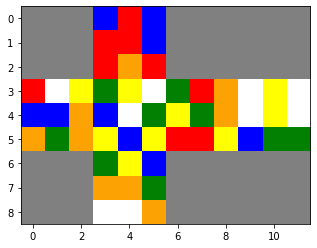

In [25]:
from cube import create_cube_visualization

create_cube_visualization(new_cube)

In [26]:
import numpy as np

def cube_translator(new_cube):
        new = np.array(new_cube).flatten()
        new_new = [ 6 for _ in range(54)]

        # changing colors from the website
        for i in range(len(new)):
            if new[i] == 0:
                new_new[i] = 1
            if new[i] == 3:
                new_new[i] = 2
            if new[i] == 5:
                new_new[i] = 3
            if new[i] == 2:
                new_new[i] = 4
            if new[i] == 4:
                new_new[i] = 5
            if new[i] == 1:
                new_new[i] = 6

        new_new_new = [ 6 for _ in range(54)]

        # red face
        for i in range(9):
            new_new_new[i] = new_new[2*9+i]

        # blue face
        for i in range(9):
            new_new_new[1*9+i] = new_new[4*9+i]

        # white face
        for i in range(9):
            new_new_new[2*9+i] = new_new[i]

        # green face
        for i in range(9):
            new_new_new[3*9+i] = new_new[5*9+i]

        # yellow face
        for i in range(9):
            new_new_new[4*9+i] = new_new[1*9+i]

        # orange face
        for i in range(9):
            new_new_new[5*9+i] = new_new[3*9+i]

        text = ""

        for i in range(len(new_new_new)):
            text += str(new_new_new[i])

        return text


## 2. Validating generated cube

Even though there are lots of possible combination in a rubik's cube, there are some that are invalid. In real life, this happens when someone physicaly changes the position of a cubie to a position that would never be reached just by changing a solved cube with some moviments.

I searched on the internet and found [this resource](https://stockton.edu/dean-of-students/documents/RubiksCubesandGroupTheoryfinalpdf.pdf) that shows how to find a cube combination (1/12) that is valid. I was not able to think about an algorithmic way of implementing it and as this is not the focus of CS156 class, I decided to webscrape a page that can offer validation to an array representing a Rubik's cube. This way, I will try to create a configuration until it is considered valid.

In [33]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time

def validate_cube(cube, driver):
    text = cube_translator(cube)

    url = 'https://rubikscu.be/solver/?cube=0'+text

    driver.get(url)
    time.sleep(15)
    if "Invalid Cube" in driver.page_source:
        return False
    else:
        return True

## 3. Finding a valid Rubik's cube

Now that we have all the resourses we need to find a valid Rubik's cube with one face with the configuration provided.

In [34]:
def find_rubiks_cube(arr):
    driver = webdriver.Chrome(ChromeDriverManager().install())

    valid = False

    new_cube = [ [6 for _ in range(9)] for _ in range(6)]

    while(not valid):
        new_cube = generate_cube(arr)

        valid = validate_cube(new_cube, driver)

    driver.close()

    return new_cube

In [ ]:
example_input = [4, 2, 4, 2, 2, 4, 2, 3, 2]

the_cube = find_rubiks_cube(example_input)

create_cube_visualization(the_cube)